Decideing whether a person's loan application will be approved or rejected on the basis of Data entered.............
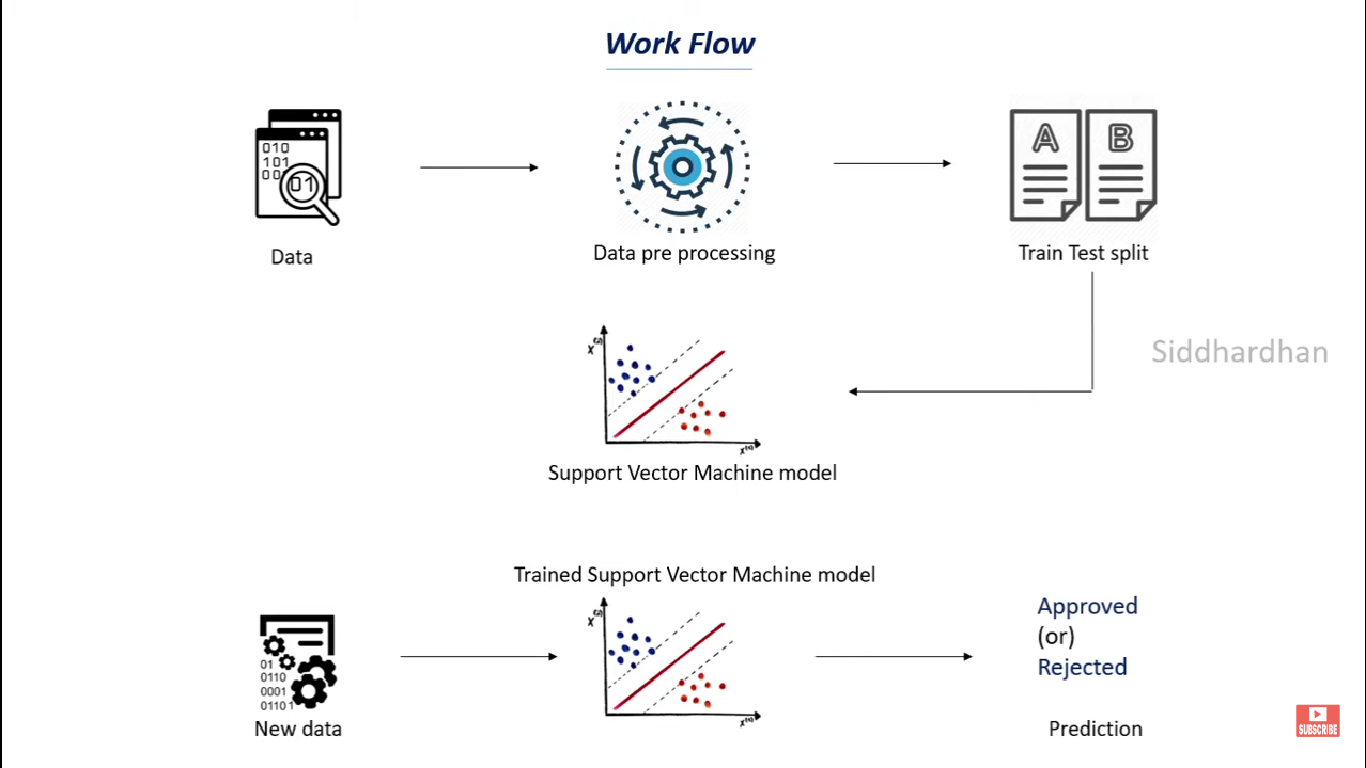

In [2]:
#importing the Dependencies
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [3]:
#importing dataset
dataset = pd.read_csv('loan_pred_dataset.csv')
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
dataset.shape

(614, 13)

In [5]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
#dropping missing values because here some values are categorical i.e. Yes or No, so here imputation(the process of filling the empty values using mean or some other statistical approach) is not possibe(because we cannot imputate categorical values)
dataset = dataset.dropna()

In [8]:
dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [9]:
dataset['Loan_Status'].value_counts()

Y    332
N    148
Name: Loan_Status, dtype: int64

In [10]:
dataset.groupby('Loan_Status').mean()

C:\Users\nikun\AppData\Local\Temp\ipykernel_10772\1727341269.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dataset.groupby('Loan_Status').mean()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Loan_Status,,,,,
N,5730.189189,1773.081081,153.378378,342.810811,0.574324
Y,5201.093373,1495.508795,140.882530,341.710843,0.978916


In [11]:
X = dataset.drop(columns = 'Loan_Status', axis = 1)
Y = dataset['Loan_Status']
X,Y

(      Loan_ID  Gender Married Dependents     Education Self_Employed  \
 1    LP001003    Male     Yes          1      Graduate            No   
 2    LP001005    Male     Yes          0      Graduate           Yes   
 3    LP001006    Male     Yes          0  Not Graduate            No   
 4    LP001008    Male      No          0      Graduate            No   
 5    LP001011    Male     Yes          2      Graduate           Yes   
 ..        ...     ...     ...        ...           ...           ...   
 609  LP002978  Female      No          0      Graduate            No   
 610  LP002979    Male     Yes         3+      Graduate            No   
 611  LP002983    Male     Yes          1      Graduate            No   
 612  LP002984    Male     Yes          2      Graduate            No   
 613  LP002990  Female      No          0      Graduate           Yes   
 
      ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
 1               4583             1508.0       1

In [12]:
#replacing N with 0 and Y with 1 in Loan_Status column
dataset.replace({'Loan_Status':{'N':0, 'Y':1}}, inplace=True)

In [13]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [14]:
dataset['Dependents'].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [15]:
#replacing all the 3+ values with 4
dataset.replace({'Dependents': {'3+':4}}, inplace=True)

In [16]:
dataset.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1
610,LP002979,Male,Yes,4,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,1
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,1
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,0


<Axes: xlabel='Education', ylabel='count'>

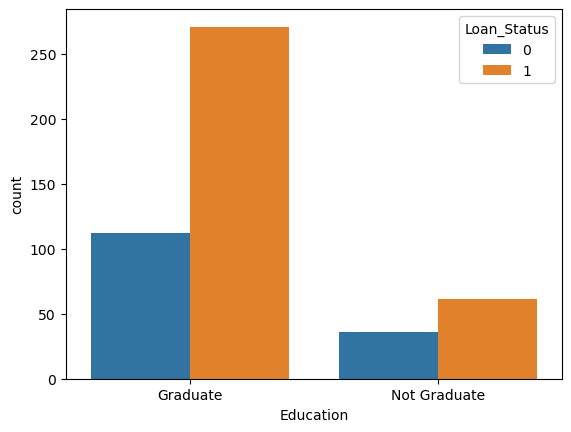

In [17]:
#Data Visualisation
#education and loan status
sns.countplot(x='Education', hue='Loan_Status', data=dataset)

<Axes: xlabel='Married', ylabel='count'>

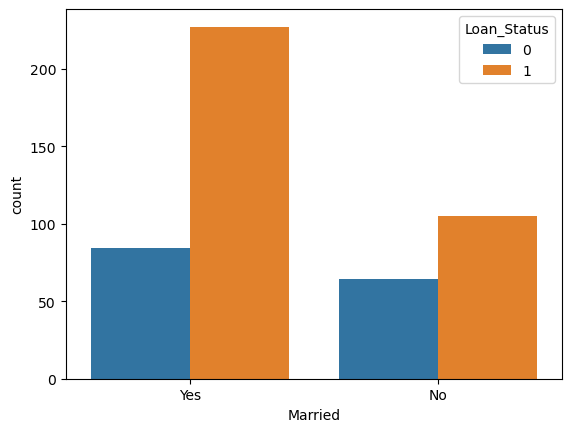

In [18]:
sns.countplot(x='Married', hue='Loan_Status', data=dataset)

In [19]:
#converting categoricals text data in numbers......
dataset.replace({'Married':{'No':0,'Yes':1}, 'Gender':{'Male':1, 'Female':0}, 'Education':{'Graduate':1, 'Not Graduate':0}, 'Self_Employed':{'Yes':1,'No':0}, 'Property_Area':{'Rural':0,'Semiurban':1, 'Urban':2}}, inplace=True)

In [20]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [25]:
#separating the dataset....
X = dataset.drop(columns=['Loan_Status','Loan_ID'], axis=1)
Y = dataset['Loan_Status']
X, Y

(     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
 1         1        1          1          1              0             4583   
 2         1        1          0          1              1             3000   
 3         1        1          0          0              0             2583   
 4         1        0          0          1              0             6000   
 5         1        1          2          1              1             5417   
 ..      ...      ...        ...        ...            ...              ...   
 609       0        0          0          1              0             2900   
 610       1        1          4          1              0             4106   
 611       1        1          1          1              0             8072   
 612       1        1          2          1              0             7583   
 613       0        0          0          1              1             4583   
 
      CoapplicantIncome  LoanAmount  Loan_Amount_T

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=2, test_size=0.1, stratify=Y)
X_train.shape, X_test.shape

((432, 11), (48, 11))

In [27]:
#training the model
classifier = svm.SVC(kernel='linear')

In [28]:
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

In [29]:
X_train_prediction = classifier.predict(X_train)
accuracy = accuracy_score(X_train_prediction, Y_train)
accuracy

0.7986111111111112

In [31]:
X_test_predict = classifier.predict(X_test)
accuracy_test = accuracy_score(X_test_predict, Y_test)
accuracy_test

0.8333333333333334

In [ ]:
#Making a prediction system
